# Praca domowa 10

### Cutting stock problem

Koncepcja rozwiązania i propozycja kodowania rozwiązań

### Kodowanie rozwiązania

Zostały stworzone klasy:
 * `Rectangle` - reprezentująca dostępny w rozwiązaniu pojedynczy prostokąt
 * `Stripe` - reprezentująca pasek składający się z kilku prostokątów znajdujących się tuż obok siebie i mających wspólne, te same boki; w pasku wszystkie prostokąty mają tę samą wysokość albo szerokość (zależy od orientacji paska)
 * `Circle` - reprezentująca pojedyncze rozwiązanie, czyli koło zapełnione paskami (`Stripe`)

### Koncepcja rozwiązania

Na początku, program musi wygenerować listę wszystkich dostępnych pasków o szerokości/długości (zależy od orientacji) mniejszej lub równej dwukrotności promienia koła (większe paski i tak nie będą miały możliwości wpasowania się do koła).

Początkowe zapełnianie obiektu `Circle` (generowanie populacji początkowej) polega na iteracyjnym wylosowaniu pozycji wewnątrz koła, wylosowaniu paska oraz próbie umieszczenia tego paska na wylosowanej pozycji (lewy dolny róg). Czas wykonywania się funkcji zapełniającej jest ograniczony poprzez parametry: maksymalny czas oraz maksymalną liczbę wstawionych pasków.

Po wygenerowaniu populacji początkowej, algorytm genetyczny rozpocznie pracę. Pomysł na jego poszczególne elementy jest następujący:
 * crossover - losowa liczba pasków z jednego koła zostanie wstawiona do drugiego koła, a jeśli będą elementy nachodzące, to te nowe elementy (wstawiane) będą miały pierwszeństwo
 * mutacja - będzie składać się z dwóch elementów:
     1. losowe przesunięcie (np. z rozkładu normalnego) pozycji pasków w każdym z kierunków, o ile w nowej pozycji paski nie wyjdą poza koło oraz nie będą nachodziły na inne paski
     2. losowe usunięcie części pasków oraz wstawienie nowych pasków algorytmem do zapełniania obiektu `Circle`
 * evaluation - wartość funkcji oceny to suma wartości prostokątów wewnątrz koła
 * selekcja - selekcja turniejowa
 
### Postęp prac

W tym tygodniu stworzyłem klasy do kodowania rozwiązań, funkcję do generowania prostokątów na podstawie danych z pliku, funkcję do generowania wszystkich możliwych pasków oraz algorytm wypełniający obiekty `Circle` obiektami `Stripe`. 

In [1]:
from GeneticAlgorithms.cutting_stock_problem import *

In [2]:
rectangles = rectangles_from_file('./data/cutting/r800.csv')

In [3]:
rectangles

[Rectangle: width=250.0, height=120.0, value=100.0,
 Rectangle: width=320.0, height=160.0, value=500.0,
 Rectangle: width=250.0, height=160.0, value=600.0,
 Rectangle: width=150.0, height=120.0, value=40.0,
 Rectangle: width=400.0, height=30.0, value=400.0]

In [4]:
res = stripe_generator(rectangles, 2 * 800)

Przyładowy pasek:

In [5]:
res[4]

Stripe: height=120.0, width=1250.0, value=500.0

Liczba wszystkich pasków:

In [6]:
len(res)

10570

Przykłady zapełniania koła paskami:

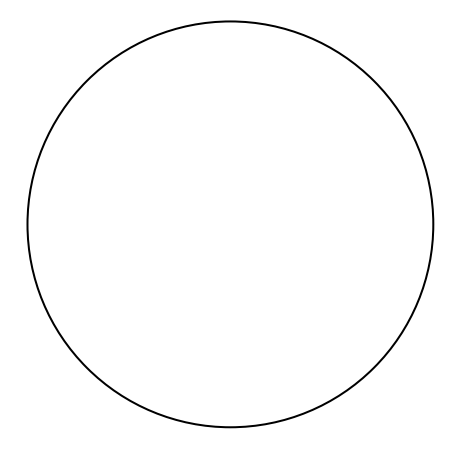

In [7]:
c = Circle(800)
c.plot()

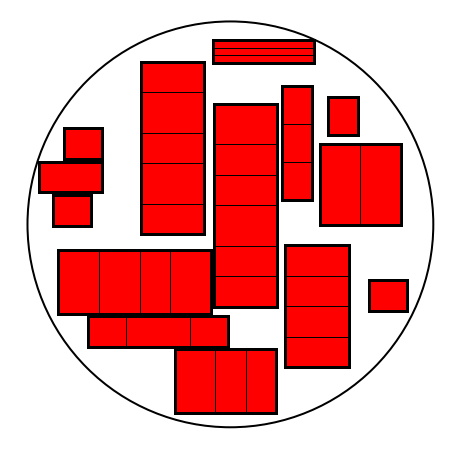

In [8]:
c.fill_with_stripes(res, time_limit=2)
c.plot()

In [9]:
c.val_evaluate()

8960.0

10700.0

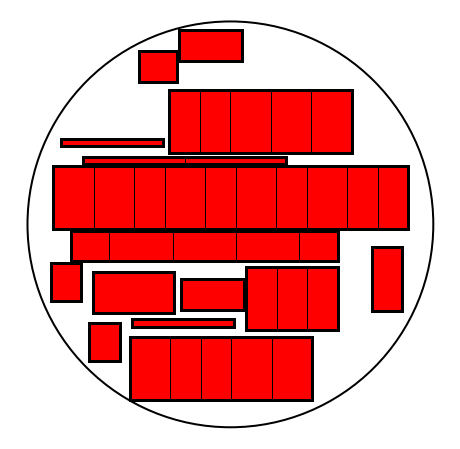

In [10]:
c1 = Circle(800)
c1.fill_with_stripes(res, time_limit=2)
c1.plot()
c1.val_evaluate()

5800.0

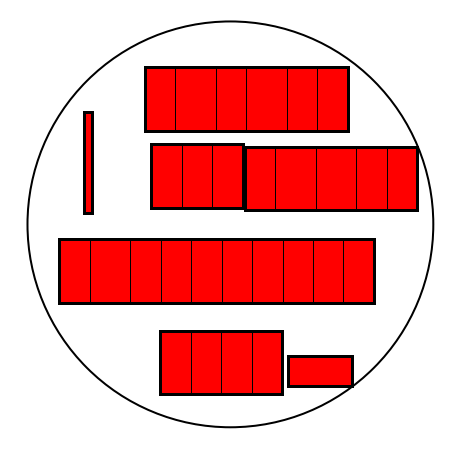

In [11]:
c2 = Circle(800)
c2.fill_with_stripes(res, time_limit=1/4)
c2.plot()
c2.val_evaluate()